C:\Users\wand\AppData\Local\Temp\ipykernel_8960\228930253.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('turbo')  # Choose a colormap


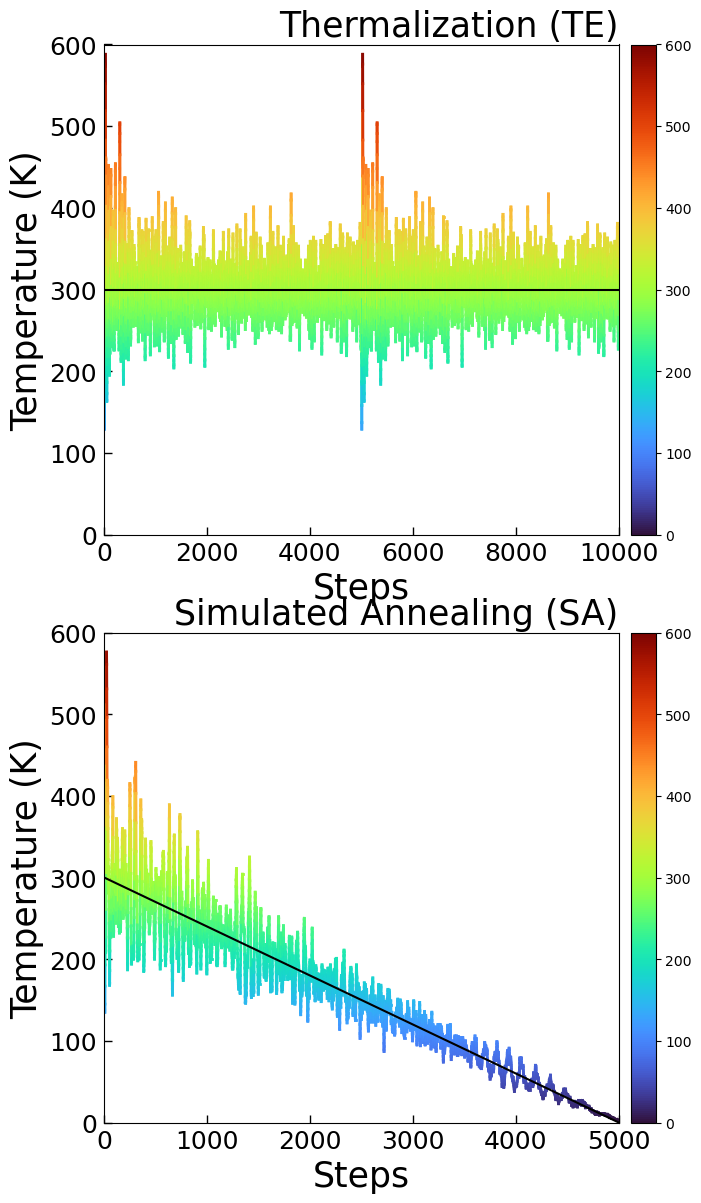

In [4]:
# ==============================================================================
# Title:        Temperature Plotting Script
# Author:       Wanderson Souza Araujo
# Created:      12/22/2023
# Last Updated: 10/05/2024
# Description:  This script reads temperature data from an OSZICAR file and
#               generates plots for TE and SA with corresponding
#               temperature color maps.
# Usage:        Run this script in a Python environment with matplotlib and
#               other necessary libraries installed.
# ==============================================================================

import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Function to load data from multiple OSZICAR files
def load_oszicar_data(filepaths):
    steps = []
    temperatures = []
    
    for filepath in filepaths:
        with open(filepath, 'r') as file:
            for line in file:
                if "T=" in line:
                    parts = line.split()
                    # Assuming temperature is indicated by "T="
                    temperature = float(parts[parts.index("T=") + 1])
                    temperatures.append(temperature)
                    steps.append(len(steps))  # Increment step based on the length
    
    return steps, temperatures

# Paths to the OSZICAR files (to be modified by user)
simulated_annealing_files = ["OSZICAR_sa1"]
thermalization_files = ["OSZICAR_te2", "OSZICAR_te2"]

# Load data for both Simulated Annealing and Thermalization
steps_sa, temperatures_sa = load_oszicar_data(simulated_annealing_files)
steps_term, temperatures_term = load_oszicar_data(thermalization_files)

# Plotting
cmap = cm.get_cmap('turbo')  # Choose a colormap
norm = plt.Normalize(0, 600)

# Create subplots for TE and SA
fig, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(8, 14))

# Plot Thermalization data
for i in range(len(steps_term) - 1):
    color = cmap(norm(temperatures_term[i]))
    ax1.plot(steps_term[i:i+2], temperatures_term[i:i+2], color=color, linewidth=2)

ax1.set_xlabel('Steps', fontsize=25)
ax1.set_ylabel('Temperature (K)', fontsize=25)
ax1.set_title('Thermalization (TE)', fontsize=25, loc='right')
ax1.axhline(y=300, color='black', linestyle='-', label='300 K')
ax1.tick_params(axis='both', which='both', direction='in', pad=5, length=6, width=1, labelsize=18)
ax1.set_xlim(0, len(steps_term))
ax1.set_ylim(0, 600)

# Color bar for Thermalization
sm1 = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm1.set_array([])  # Prevent scale error
cbar1 = fig.colorbar(sm1, ax=ax1, orientation='vertical', pad=0.02)

# Plot Simulated Annealing data
for i in range(len(steps_sa) - 1):
    color = cmap(norm(temperatures_sa[i]))
    ax2.plot(steps_sa[i:i+2], temperatures_sa[i:i+2], color=color, linewidth=2)

# Line for Simulated Annealing
ax2.plot([0, len(steps_sa)], [300, 0], color='black', linestyle='-', label='Line')
ax2.set_xlabel('Steps', fontsize=25)
ax2.set_ylabel('Temperature (K)', fontsize=25)
ax2.set_title('Simulated Annealing (SA)', fontsize=25, loc='right')
ax2.tick_params(axis='both', which='both', direction='in', pad=5, length=6, width=1, labelsize=18)
ax2.set_xlim(0, len(steps_sa))
ax2.set_ylim(0, 600)

# Color bar for Simulated Annealing
sm2 = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm2.set_array([])  # Prevent scale error
cbar2 = fig.colorbar(sm2, ax=ax2, orientation='vertical', pad=0.02)

plt.show()
